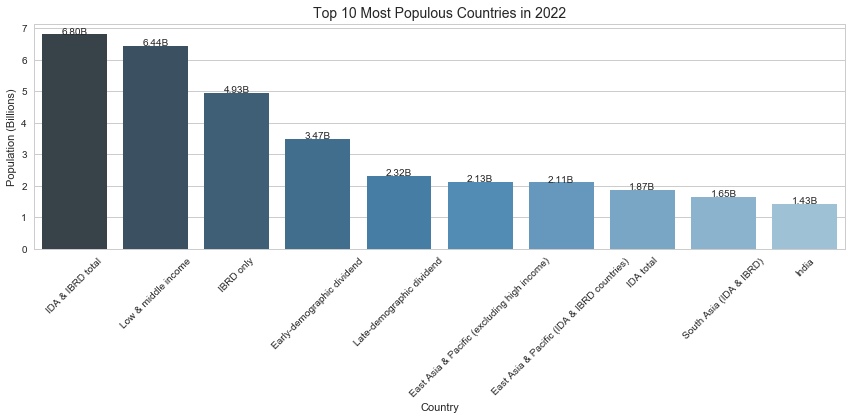

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
sns.set(style="whitegrid")

# Load the dataset
df = pd.read_csv(
    r"C:\Users\aksha\OneDrive\Desktop\WORLD BANK\API_SP.POP.TOTL_DS2_en_csv_v2_38144.csv",
    skiprows=4
)

# Remove aggregate regions
regions = [
    'World', 'High income', 'Low income', 'Middle income', 'Upper middle income',
    'Lower middle income', 'East Asia & Pacific', 'Europe & Central Asia',
    'Latin America & Caribbean', 'Sub-Saharan Africa', 'South Asia', 'North America'
]
df = df[~df['Country Name'].isin(regions)]

# Set the year for analysis
year = '2022'

# Get top 10 most populous countries
top10 = df[['Country Name', year]].dropna().sort_values(by=year, ascending=False).head(10)

# Convert population to billions
top10[year] = top10[year] / 1e9

# Create the plot
plt.figure(figsize=(12, 6))
plot = sns.barplot(data=top10, x='Country Name', y=year, palette='Blues_d')

# Add population labels on top of bars
for bar in plot.patches:
    height = bar.get_height()
    plot.text(
        bar.get_x() + bar.get_width() / 2,
        height + 0.01,
        f'{height:.2f}B',
        ha='center',
        fontsize=10
    )

# Final plot adjustments
plt.title(f"Top 10 Most Populous Countries in {year}", fontsize=14)
plt.ylabel("Population (Billions)")
plt.xlabel("Country")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()